**PHẠM NGUYỄN DUY TIẾN 19146017**

In [28]:
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [29]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/fruit_tropical.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)


    return pixels, labels

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [31]:
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(1000, 128, 128, 3)
(1000, 10)


In [41]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [42]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=20, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/20
13/13 [==============================] - 6s 377ms/step - loss: 6.1933 - accuracy: 0.1075 - val_loss: 2.2040 - val_accuracy: 0.1800
Epoch 2/20
13/13 [==============================] - 5s 353ms/step - loss: 2.0842 - accuracy: 0.2325 - val_loss: 1.9056 - val_accuracy: 0.2450
Epoch 3/20
13/13 [==============================] - 6s 459ms/step - loss: 1.7542 - accuracy: 0.3575 - val_loss: 1.5704 - val_accuracy: 0.3300
Epoch 4/20
13/13 [==============================] - 4s 343ms/step - loss: 1.5567 - accuracy: 0.4112 - val_loss: 1.4473 - val_accuracy: 0.4200
Epoch 5/20
13/13 [==============================] - 4s 339ms/step - loss: 1.3359 - accuracy: 0.4913 - val_loss: 1.1842 - val_accuracy: 0.5250
Epoch 6/20
13/13 [==============================] - 4s 342ms/step - loss: 1.1488 - accuracy: 0.5638 - val_loss: 1.3105 - val_accuracy: 0.4700
Epoch 7/20
13/13 [==============================] - 4s 342ms/step - loss: 0.9919 - accuracy: 0.6212 - val_loss: 1.0730 - val_accuracy: 0.5750
Epoch 

In [43]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 71.8448
Test accuracy 0.8200


In [44]:
model.save('Final.h5')

In [45]:
from keras.models import load_model
model5=load_model('Final.h5')

In [51]:
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

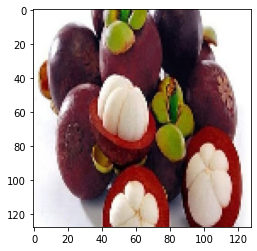

In [61]:
img = load_img('/content/MangCut.jpg',target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)

In [62]:
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
# Convert to tensor
img = np.expand_dims(img, axis=0)

In [63]:
class_name = ['Cam','Chuoi','Dua','Man_roi','MangCut','Nhan','Nho','Tao','Vai','XoaiXanh']

In [64]:
model_5 = load_model('Final.h5')
predict = model_5.predict(img)
class_name[np.argmax(predict[0])], (predict[0])

('MangCut', array([1.6184570e-10, 3.6470633e-09, 2.9178593e-09, 2.2900011e-05,
        9.9988234e-01, 4.1910785e-06, 8.3460152e-05, 4.1014214e-06,
        1.9190059e-06, 1.0513460e-06], dtype=float32))